# Import libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Two sample t test

This test assumes that the populations have identical variances by default

In [2]:
df=pd.read_excel(r'statistic_data.xlsx', sheet_name="two_sample_nd")

In [3]:
df.head()

,Group_1,Group_2
0,30,37
1,27,39
2,21,31
3,27,31
4,29,34


In [4]:
group_1=df['Group_1']
group_2=df['Group_2']

In [5]:
print(len(group_1))
print(len(group_2))

30
30


Since the number of members of both groups is less than 120, normality test must be done.

## Normality test

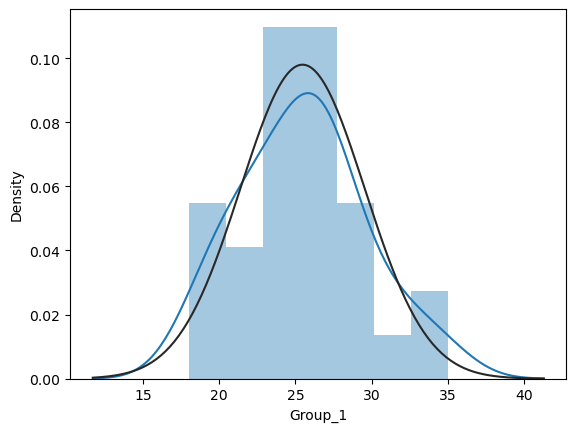

In [6]:
sns.distplot(group_1, fit=stats.norm)
plt.show()

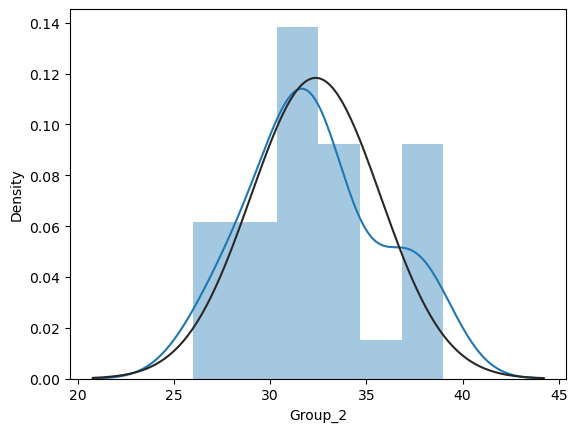

In [7]:
sns.distplot(group_2, fit=stats.norm)
plt.show()

In [8]:
print(stats.shapiro(group_1))

ShapiroResult(statistic=0.9789243936538696, pvalue=0.7962851524353027)


In [9]:
print(stats.shapiro(group_2))

ShapiroResult(statistic=0.9561262130737305, pvalue=0.24584470689296722)


As can be seen, since both groups have normal distribution, we can apply the t test.

### Two sample T test

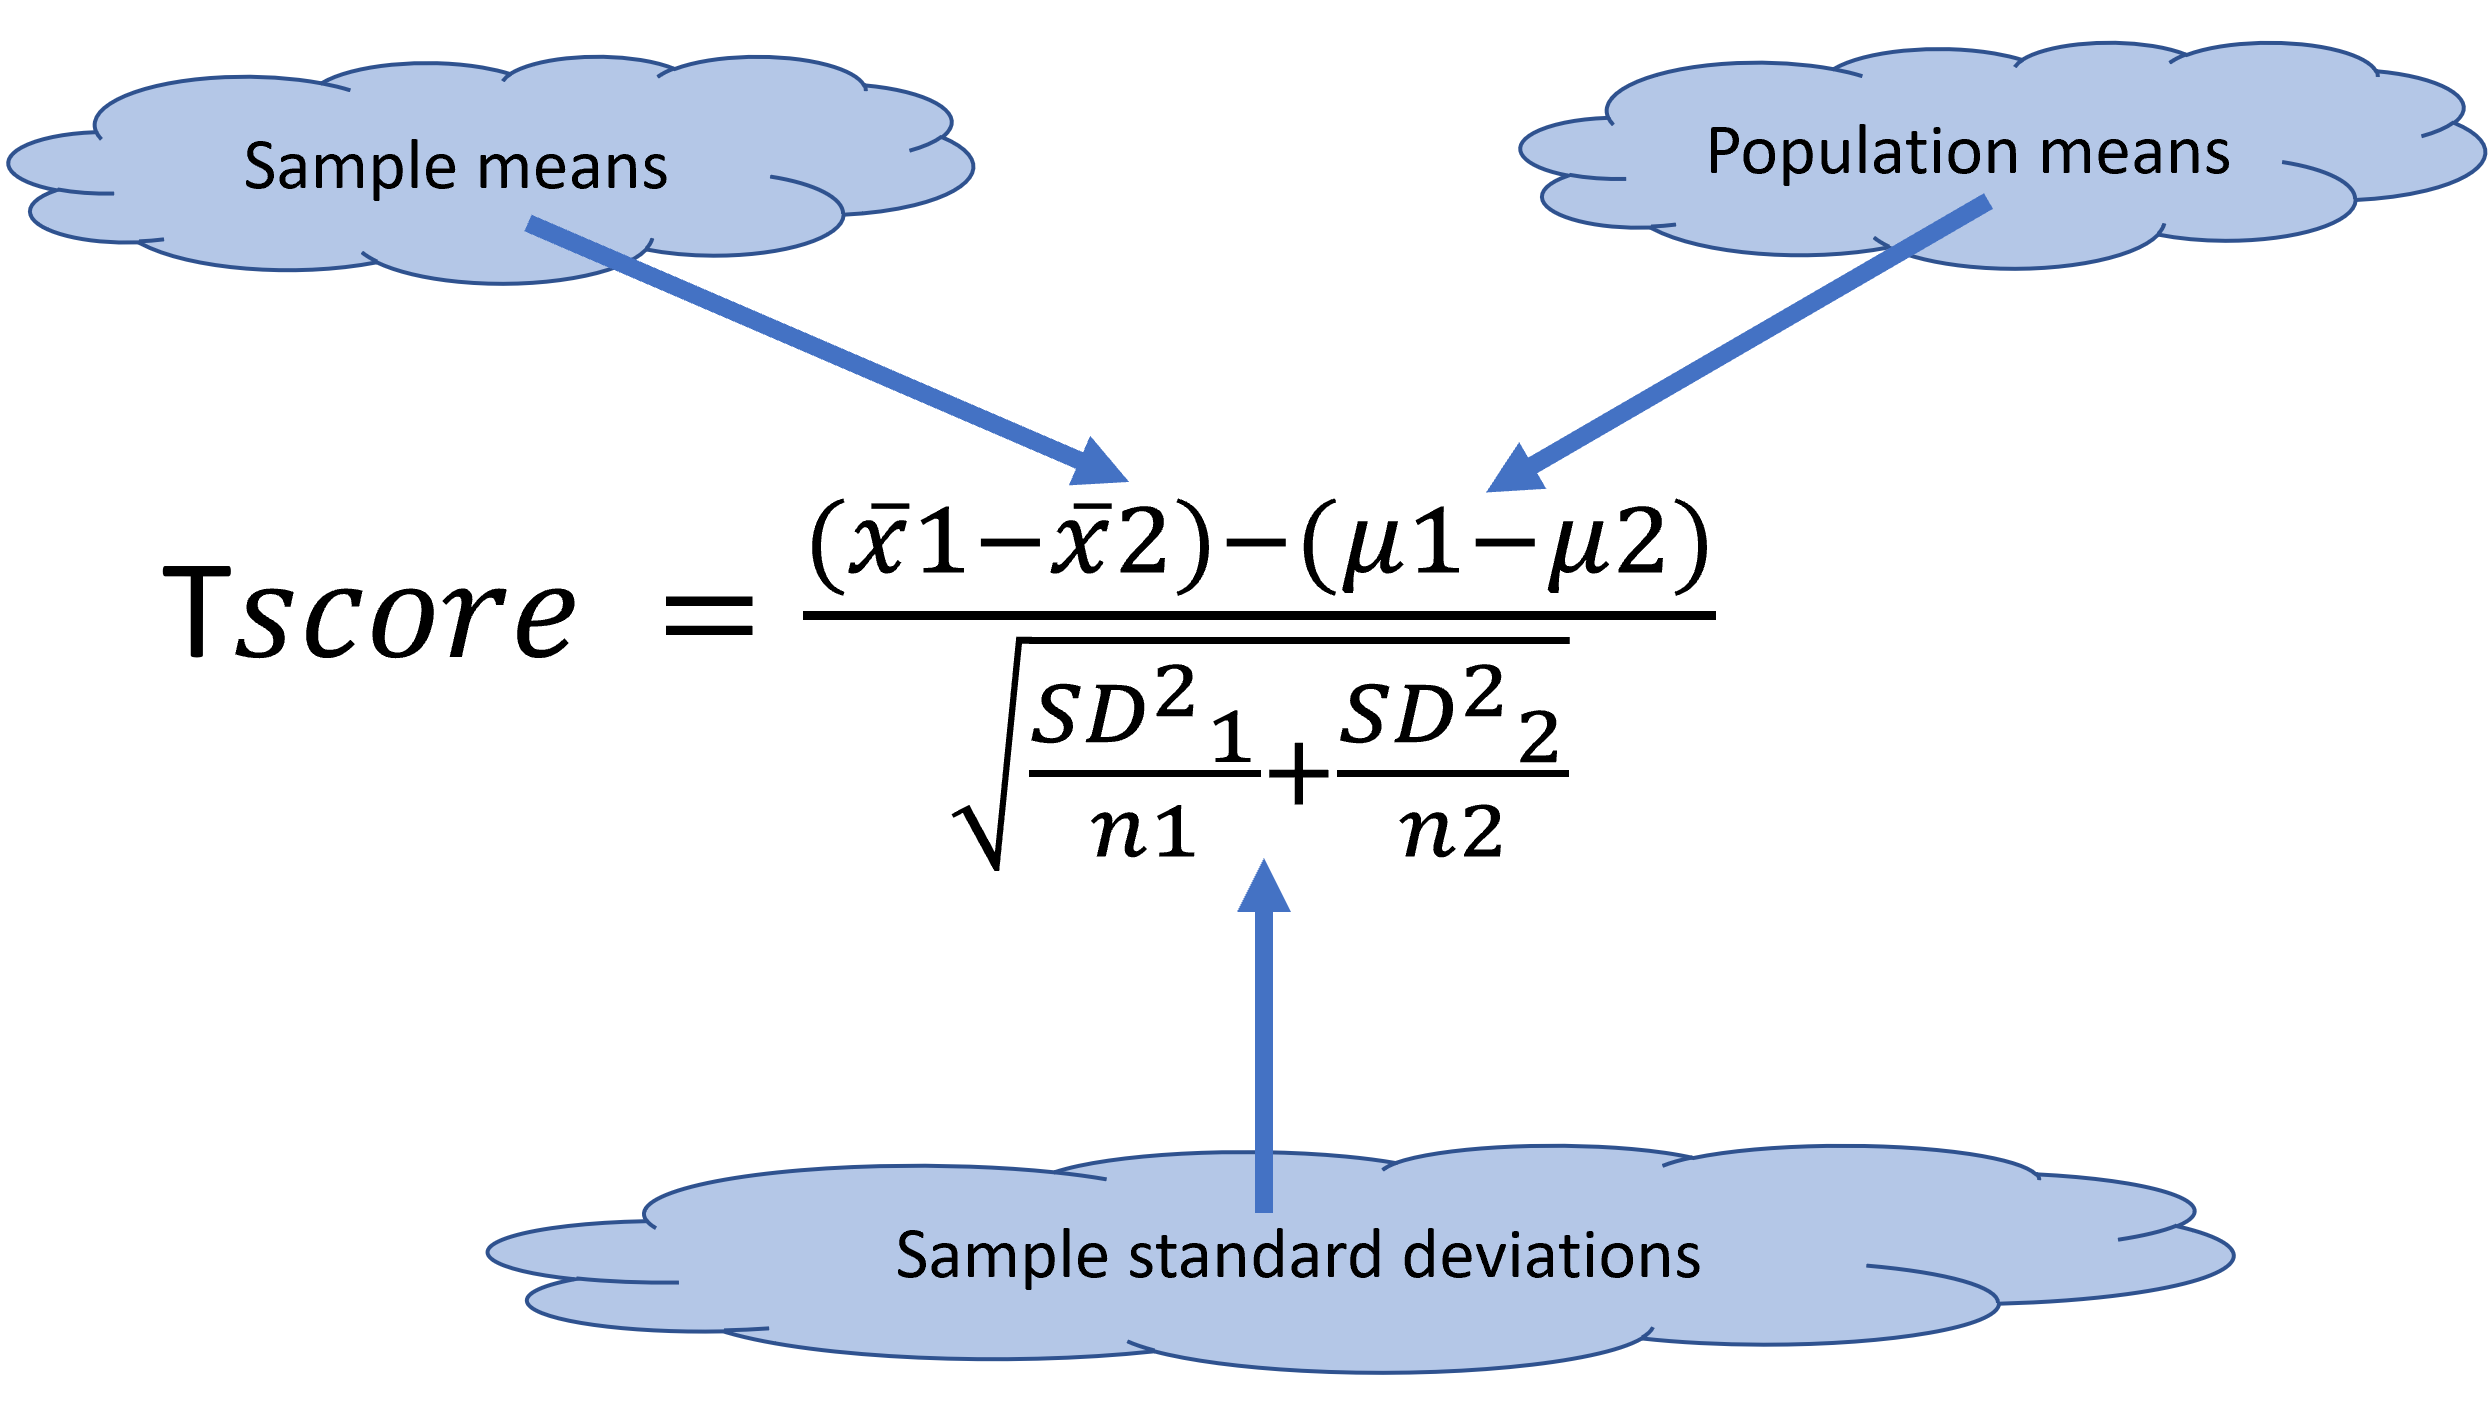

H0 (null hypothesis): mu1-mu2=0                                            
H1 (alternative hypotesis): mu1-m2!=0

In [10]:
print(stats.ttest_ind(group_1, group_2, alternative='two-sided', equal_var=True))

print(stats.t.ppf(q=1-.05/2,df=len(group_1)-1))

TtestResult(statistic=-7.028690967745927, pvalue=2.6233215605475075e-09, df=58.0)
2.045229642132703


As you can see, H0 is rejected. Then there is a significant difference between the mean of mu1 and m2. Then we change our hypothesis as follows

H0 (null hypothesis): mu1-mu2=0                                            
H1 (alternative hypotesis): mu1-m2<0

In [11]:
print(stats.ttest_ind(group_1, group_2, alternative='less'))

print(stats.t.ppf(q=.05,df=len(group_1)-1))

TtestResult(statistic=-7.028690967745927, pvalue=1.3116607802737537e-09, df=58.0)
-1.6991270265334977


As you can see, H0 is rejected. Then H1 is accepted. There is a statistically significant difference between the means and this difference is in favor of the 2nd group. That is, the average of the 2nd group is higher.

# Mann Whitney U-test

In [12]:
df=pd.read_excel(r'statistic_data.xlsx', sheet_name="finance_marketing_data")

In [13]:
df.head()

,salary,program
0,43.250,finance
1,45.578,finance
2,44.586,finance
3,41.112,finance
4,41.954,finance


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   salary   100 non-null    float64
 1   program  100 non-null    object 
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


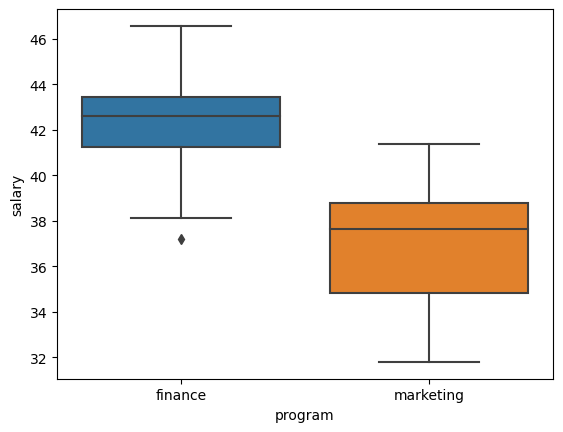

In [15]:
sns.boxplot(x="program", y="salary", data=df)
plt.show()

In [16]:
finance=df[df['program']=='finance']['salary']

marketing=df[df['program']=='marketing']['salary']

In [17]:
print(len(finance))
print(len(marketing))

50
50


Since the number of data is less than 120 we have to test for normality

### Normality test

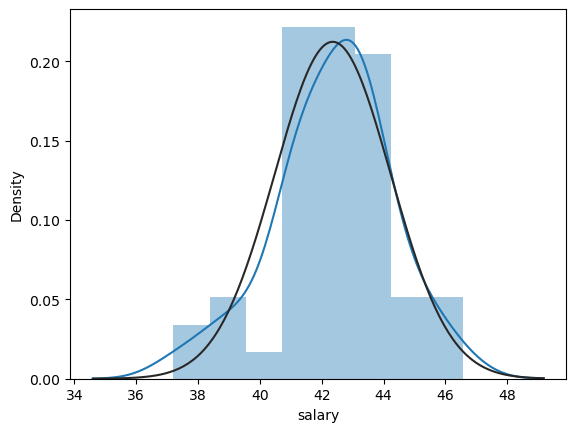

In [18]:
sns.distplot(finance, fit=stats.norm)
plt.show()

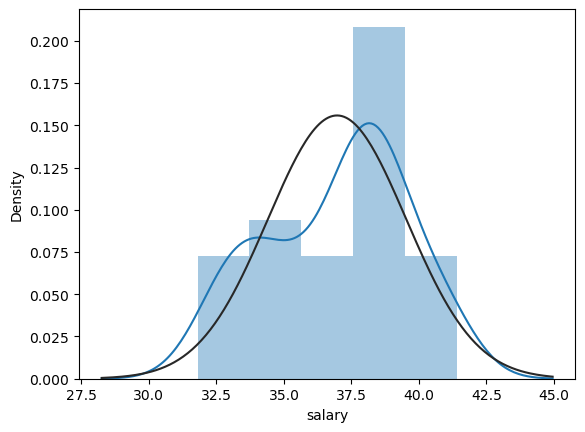

In [19]:
sns.distplot(marketing, fit=stats.norm)
plt.show()

In [20]:
print(stats.shapiro(finance))
print(stats.shapiro(marketing))

ShapiroResult(statistic=0.9784947633743286, pvalue=0.49037569761276245)
ShapiroResult(statistic=0.9520381689071655, pvalue=0.04139408841729164)


As can be seen from the results, although the finance data has a normal distribution, the marketing data does not have a normal distribution. That's why we don't use a t-test. Then we use Mann–Whitney U test.

H0 (null hypothesis): marketing_med-finance_med=0                                            
H1 (alternative hypotesis): marketing_med-finance_med!=0

In [21]:
group_A=[3, 4, 2, 6, 2, 5]
group_B=[9, 7, 5, 10, 6, 8]

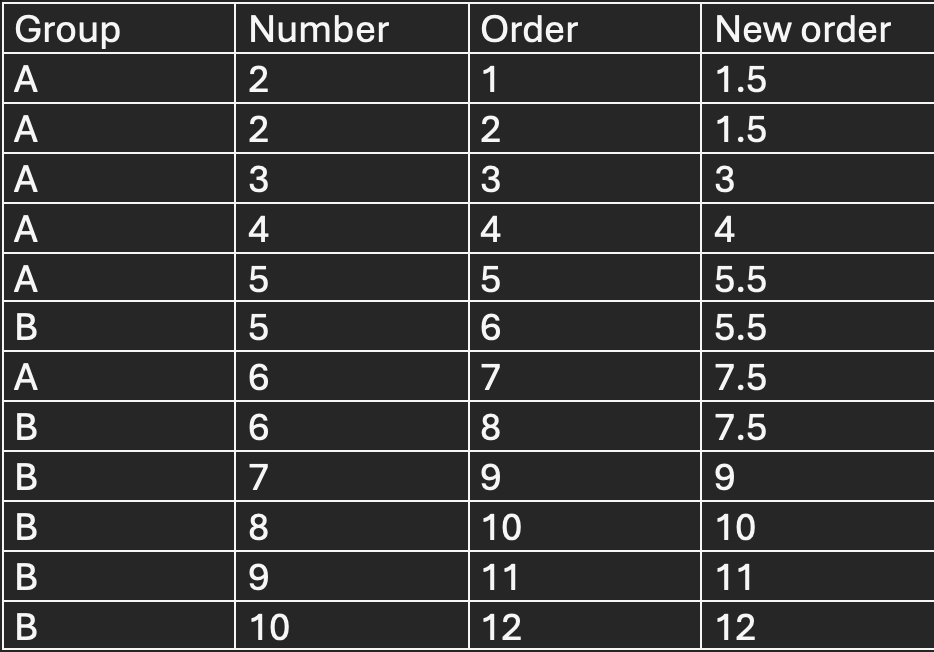

$$ R_{1}=1.5+1.5+3+4+5.5+7.5=23 $$

$$ R_{2}=5.5+7.5+9+10+11+12=55 $$

**$$ U_{1}=n_{1}*n_{2}+\frac{n_{1}*(n_{1}+1)}{2}-R_{1} $$**

**$$ U_{2}=n_{1}*n_{2}-U_{1} $$**

$$ U_{1}=6*6+\frac{6*7}{2}=36+21-23=34 $$

$$ U_{2}=36-34=2 $$

**$$ U=min(U_{1}, U_{2}) $$**

$$ U=min(34, 2)=2 $$

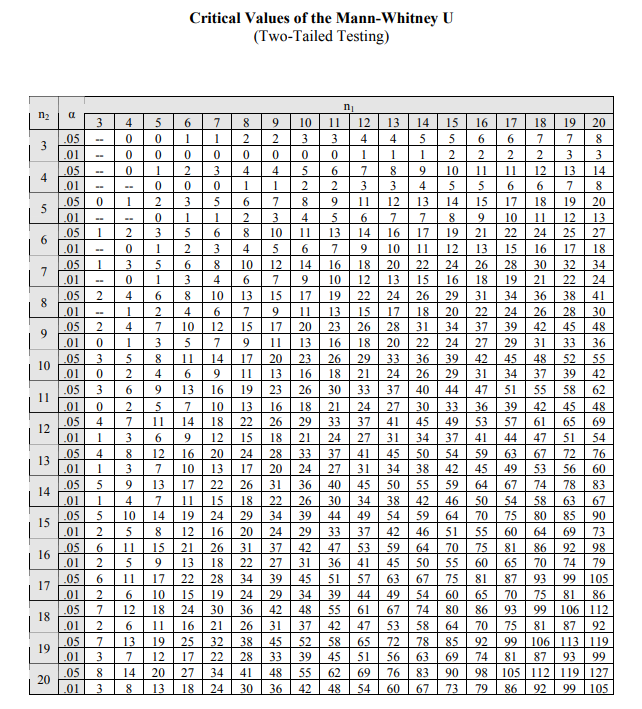

$$ U_{statistic}=2 $$
$$ U_{table}=5 $$

#####  $$ U_{s}<U_{t}, reject H_{0} $$

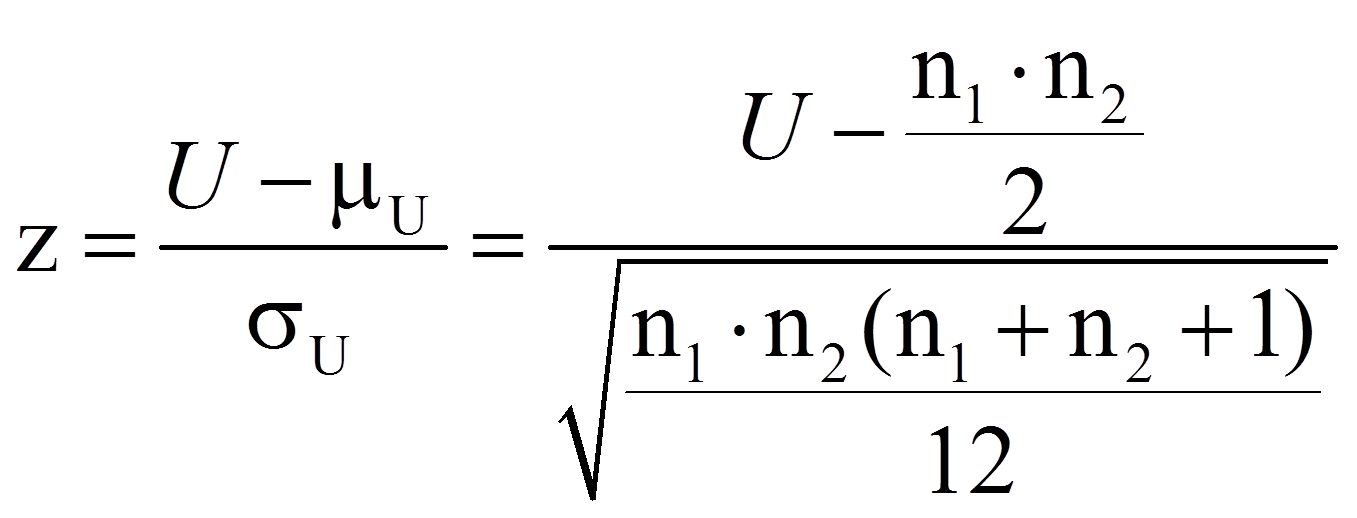

$$ z=\frac{2-(\frac{6*6}{2})}{\sqrt\frac{6*6*13}{12}}=-2.56  $$

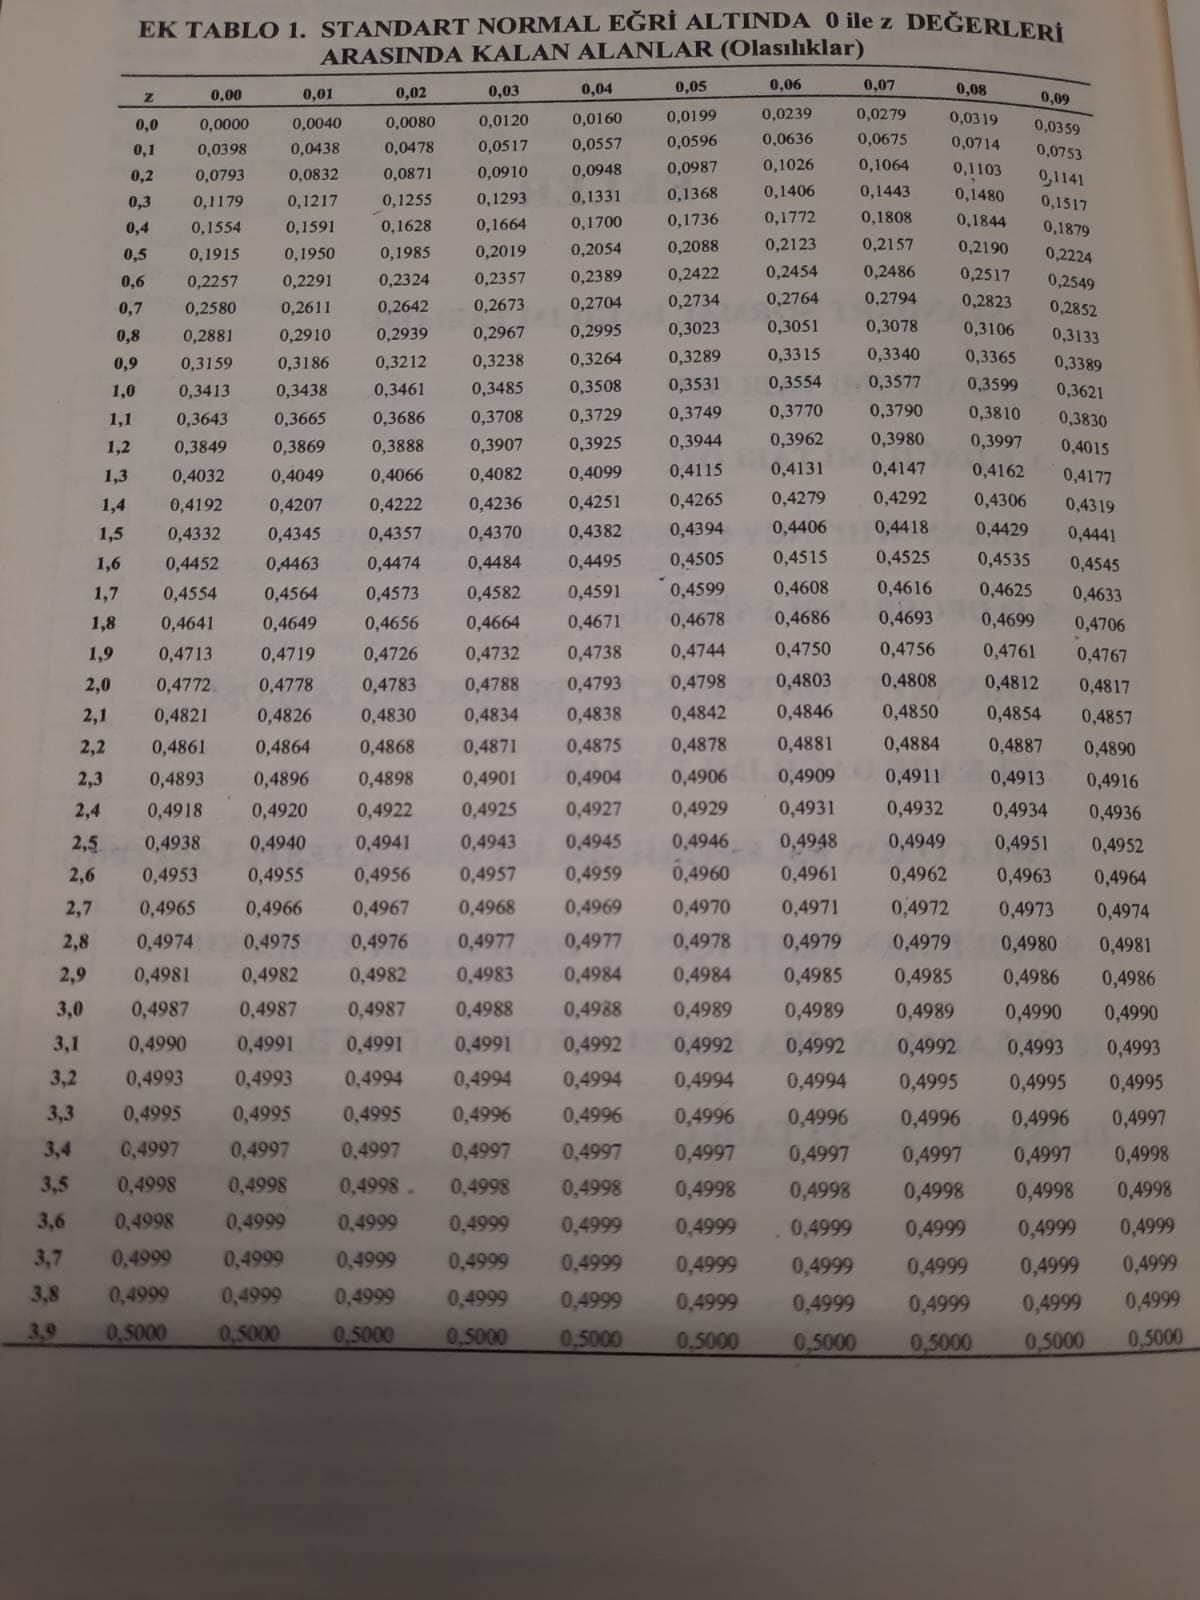

$$ z=0.4948  $$

$$ one-sided p value=0.5-0.4948=0.00519 $$

$$ two-sided p value=0.00519*2=0.01 $$

In [22]:
print(stats.mannwhitneyu(group_A, group_B, alternative='two-sided')) 

MannwhitneyuResult(statistic=2.0, pvalue=0.012591911490379705)


The p-value tests the significance of the difference between the two groups. Here, the p-value is approximately 0.01.
If your significance level (alpha) is 0.05, this p-value being 0.0126 indicates that the result is statistically significant, meaning there is a significant difference between the two groups.

In [23]:
print(stats.mannwhitneyu(finance, marketing, alternative='two-sided')) 

MannwhitneyuResult(statistic=2401.0, pvalue=2.1679418796252717e-15)


**Note: mannwhitneyu always reports the statistic associated with the first sample**

H0 is rejected because the p value is less than 0.05. That is, there is a significant difference between the medians of the 2 data. Now, let's change the hypothesis and see which group the difference favors.

H0 (null hypothesis): marketing_med-finance_med>=0                                            
H1 (alternative hypotesis): marketing_med-finance_med<0

In [24]:
print(stats.mannwhitneyu([8,7,6,9,5], [7, 10, 12, 8,9], alternative='less'))

MannwhitneyuResult(statistic=4.5, pvalue=0.056923149003329024)


H0 is rejected because the p value is less than 0.05. We have just mentioned that there is a significant difference between the medians. Now we have seen that the median of financial data is greater than the median of marketing data.

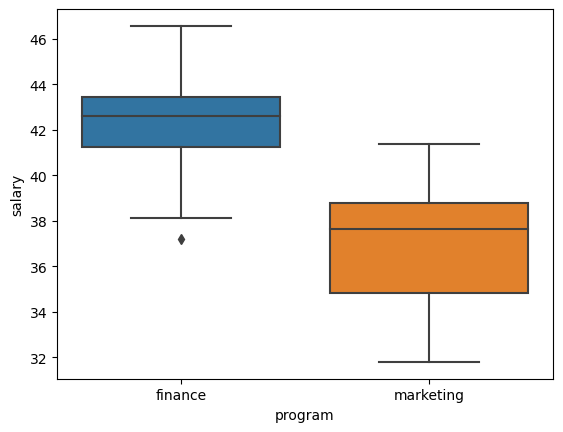

In [25]:
sns.boxplot(x='program', y='salary', data=df)
plt.show()